In [1]:
import uproot4
from matplotlib import pyplot as plt
from hist import Hist
import hist
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.image as mpimg
import seaborn as sns

### Reading the root file

In [2]:
file=uproot4.open("pi.root")


tree= file["events"]

entries=tree.num_entries

print(f"Total entries is {entries}")

FileNotFoundError: file not found

    'pi.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.


In [ ]:
pos_x= tree['gem_trd/gem_trd.position.x'].array()
pos_y= tree['gem_trd/gem_trd.position.y'].array()
pos_z= tree['gem_trd/gem_trd.position.z'].array()
ene= tree['gem_trd/gem_trd.EDep'].array()*(10**6)
mom_z= tree['gem_trd/gem_trd.momentum.z'].array()

flat_posX=ak.flatten(pos_x)
flat_posY=ak.flatten(pos_y)
flat_posZ=ak.flatten(pos_z)
flat_ene=ak.flatten(ene) #to keV
flat_momZ=ak.flatten(mom_z)

In [ ]:
tree['gem_trd/gem_trd.EDep'].array()

### Plotting 2d histograms 

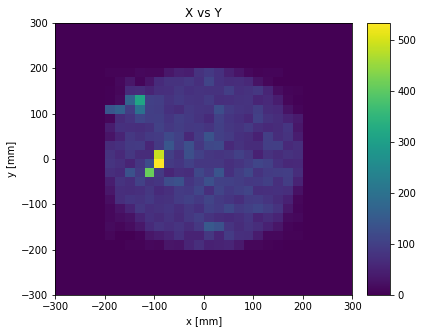

In [18]:
#X vs Y
plt.figure(figsize=(6,5))
h = Hist(
    hist.axis.Regular(30, -300, 300, name="X", label="x [mm]", flow=False),
    hist.axis.Regular(30,-300, 300, name="Y", label="y [mm]", flow=False),
)


h.fill(flat_posX,flat_posY)
h.plot()
plt.title("X vs Y")
plt.show()

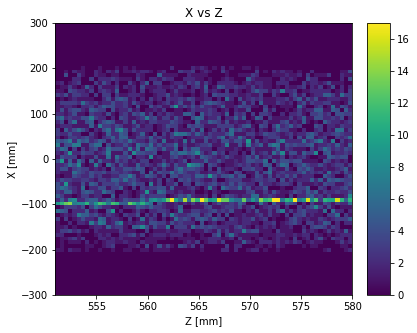

In [19]:
# X vs Z
# Note:- The dark yellow point in the graph indictaes that the frequency of that particular point is highest 
# (800 in this case)

plt.figure(figsize=(6,5))
h = Hist(
    hist.axis.Regular(70, 551, 580, name="Z", label="Z [mm]", flow=False),
    hist.axis.Regular(70,-300, 300, name="X", label="X [mm]", flow=False),
)

h.fill(flat_posZ,flat_posX)
h.plot()
plt.title("X vs Z")
plt.show()

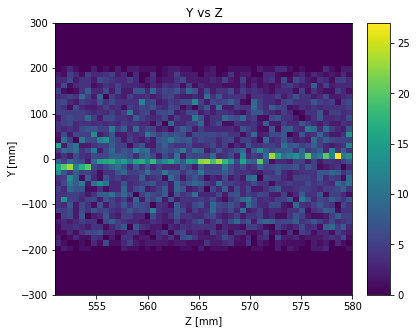

In [20]:
# Y vs Z
plt.figure(figsize=(6,5))
h = Hist(
    hist.axis.Regular(50, 551, 580, name="Z", label="Z [mm]", flow=False),
    hist.axis.Regular(50,-300, 300, name="Y", label="Y [mm]", flow=False),
)

h.fill(flat_posZ,flat_posY)
h.plot()
plt.title("Y vs Z")
plt.show()

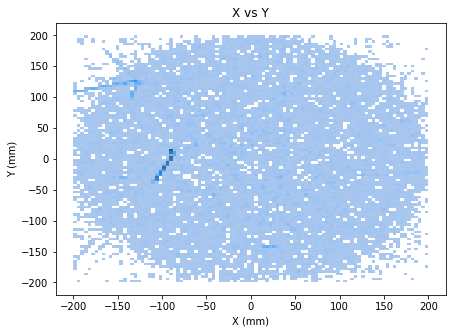

In [23]:
# Using Seaborn library
#X vs Y

plt.figure(figsize=(7,5))
sns.histplot(x=flat_posX,y=flat_posY,bins=100)
plt.title("X vs Y")
plt.xlabel("X (mm)")
plt.ylabel("Y (mm)")
plt.show()


### Position in Z direction

The two peaks corresponds to the entry and exit of the particle in the 30mm drift chamber

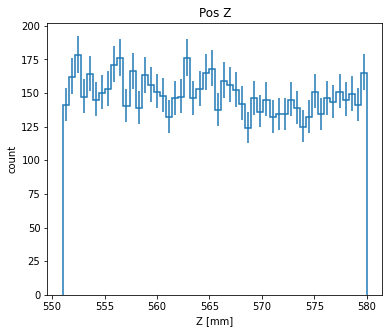

In [26]:
# position Z 
plt.figure(figsize=(6,5))
h = Hist(
    hist.axis.Regular(50, 551, 580, name="Z", label="Z [mm]", flow=False),)

h.fill(flat_posZ)
h.plot()
plt.ylabel('count')
plt.title("Pos Z")
plt.show()

### Histograms for momentum in Z direction

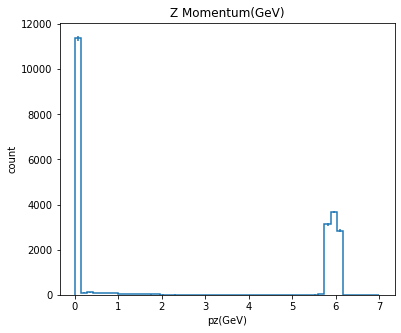

In [30]:
plt.figure(figsize=(6,5))
h = Hist(hist.axis.Regular(50, 0, 7, name="pz(GeV)", label="pz(GeV)", flow=False),)

h.fill(flat_momZ)
h.plot()
plt.ylabel('count')
plt.title("Z Momentum(GeV)")
plt.show()

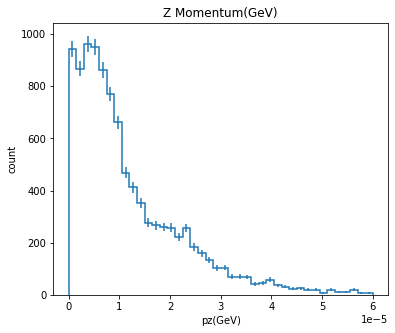

In [31]:
# Z momentum (Zoomed)


plt.figure(figsize=(6,5))
h = Hist(hist.axis.Regular(40, 0, 0.00006, name="pz(GeV)", label="pz(GeV)", flow=False),)
# 0 - 60KeV

h.fill(flat_momZ)
h.plot()
plt.ylabel('count')
plt.title("Z Momentum(GeV)")
plt.show()

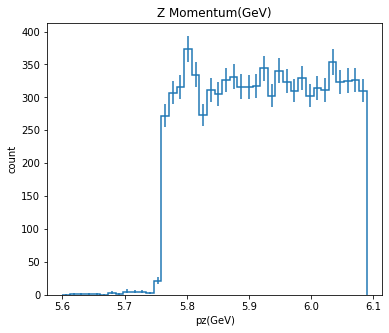

In [33]:
# Z momentum (Zoomed)
plt.figure(figsize=(6,5))
h = Hist(hist.axis.Regular(40, 5.6, 6.09, name="pz(GeV)", label="pz(GeV)", flow=False),)

h.fill(flat_momZ)
h.plot()
plt.ylabel('count')
plt.title("Z Momentum(GeV)")
plt.show()

/home/nilay/.local/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


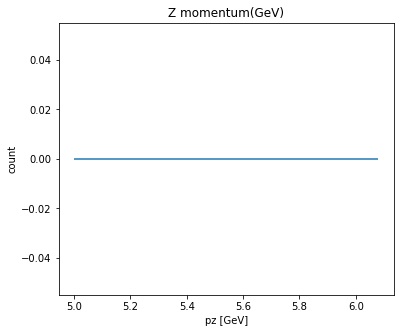

In [34]:

# # Removing the noise by masking
# bool_mask = pos_z > 551
# masked_momZ = mom_z[bool_mask]

# plt.figure(figsize=(6,5))
# mom_hst = Hist(hist.axis.Regular(50, 5, 6.08, name="pz [GeV]", label="pz [GeV]", underflow=False, overflow=False),)
# mom_hst.fill(ak.flatten(masked_momZ))
# mom_hst.plot()
# plt.title("Z momentum(GeV)")
# plt.ylabel("count")
# plt.show()


### Histograms for Energy Deposit

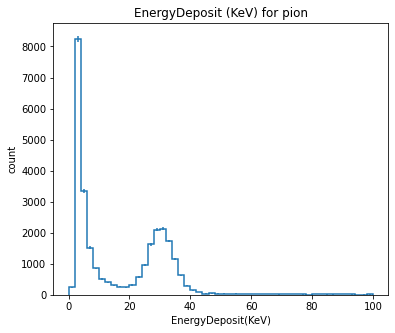

In [36]:
#Energy Deposit
plt.figure(figsize=(6,5))
h = Hist(hist.axis.Regular(50, 0, 100, name="EnergyDeposit(KeV)", label="EnergyDeposit(KeV)", flow=False),)

h.fill(flat_ene)
h.plot()
plt.ylabel('count')
plt.title("EnergyDeposit (KeV) for pion")
plt.show()

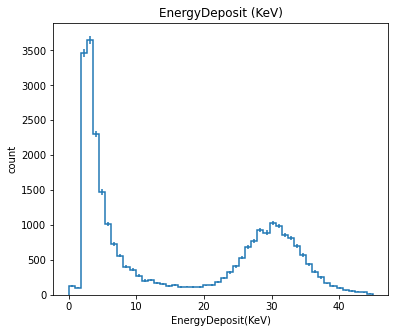

In [38]:
#EnergyDeposit(zoomed)
plt.figure(figsize=(6,5))
h = Hist(hist.axis.Regular(50, 0, 45, name="EnergyDeposit(KeV)", label="EnergyDeposit(KeV)", flow=False),)

h.fill(flat_ene)
h.plot()
plt.ylabel('count')
plt.title("EnergyDeposit (KeV)")
plt.show()

### Weighted histograms

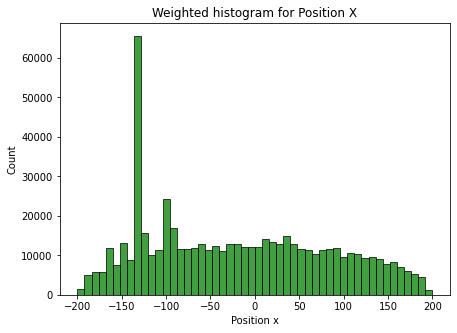

In [39]:
# Pos X
# Energy is in KeV
plt.figure(figsize=(7,5))
sns.histplot(x=flat_posX,bins=50,weights=flat_ene,color="g")
plt.title("Weighted histogram for Position X")
plt.xlabel("Position x")
plt.show()

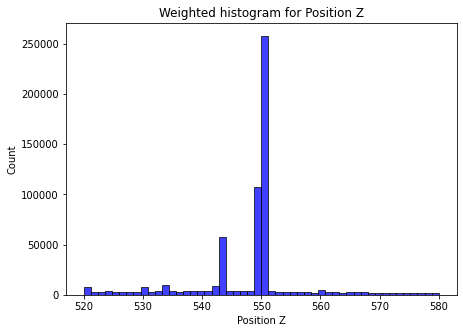

In [40]:
# Pos Z
plt.figure(figsize=(7,5))
sns.histplot(x=flat_posZ,bins=50,weights=flat_ene,color="b")
plt.title("Weighted histogram for Position Z")
plt.xlabel("Position Z")
plt.show()